In [46]:
#import required packages
import pandas  as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression





#load data 
#Existing employee data in sheet1 into data1
data1 = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name=1)
#employees who left into data2 
data2 = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name=2)
#introduce column 'Attrition' to indicate attrition if the  employees left or stayed
data1.insert(1, 'Attrition', 0)

data2.insert(1, 'Attrition', 1)


In [47]:
#combine the two dataframes 
full_data = pd.concat([data1,data2])
#the a look at the first few records of the data
full_data.head(5)


,Emp ID,Attrition,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0,0.49,0.60,3,214,2,0,0,sales,low


In [48]:
#peak at the last few records of data
full_data.tail(5)

,Emp ID,Attrition,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,1,0.40,0.57,2,151,3,0,0,support,low
3567,14996,1,0.37,0.48,2,160,3,0,0,support,low
3568,14997,1,0.37,0.53,2,143,3,0,0,support,low
3569,14998,1,0.11,0.96,6,280,4,0,0,support,low
3570,14999,1,0.37,0.52,2,158,3,0,0,support,low


In [49]:
#check for missing values 
full_data.isnull().any()

Emp ID                   False
Attrition                False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

In [50]:
#check the number who left and those who did not
full_data["Attrition"].value_counts()

0    11428
1     3571
Name: Attrition, dtype: int64

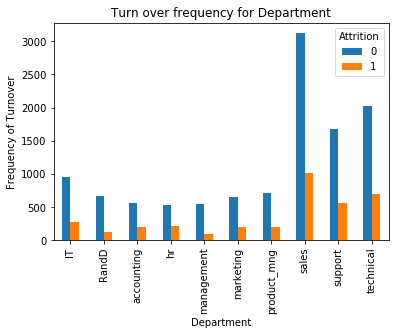

In [51]:
#do visualitions
pd.crosstab(full_data.dept,full_data.Attrition).plot(kind='bar')
plt.title('Turn over frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

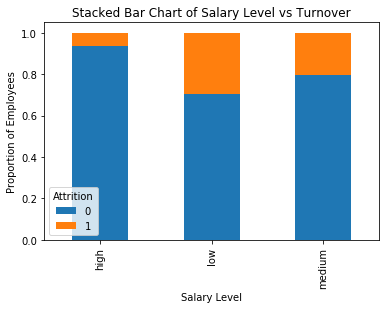

In [52]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(full_data.salary, full_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [53]:
#Proportion of employees who left by department
pd.crosstab(full_data.dept,full_data.Attrition)

Attrition,0,1
dept,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


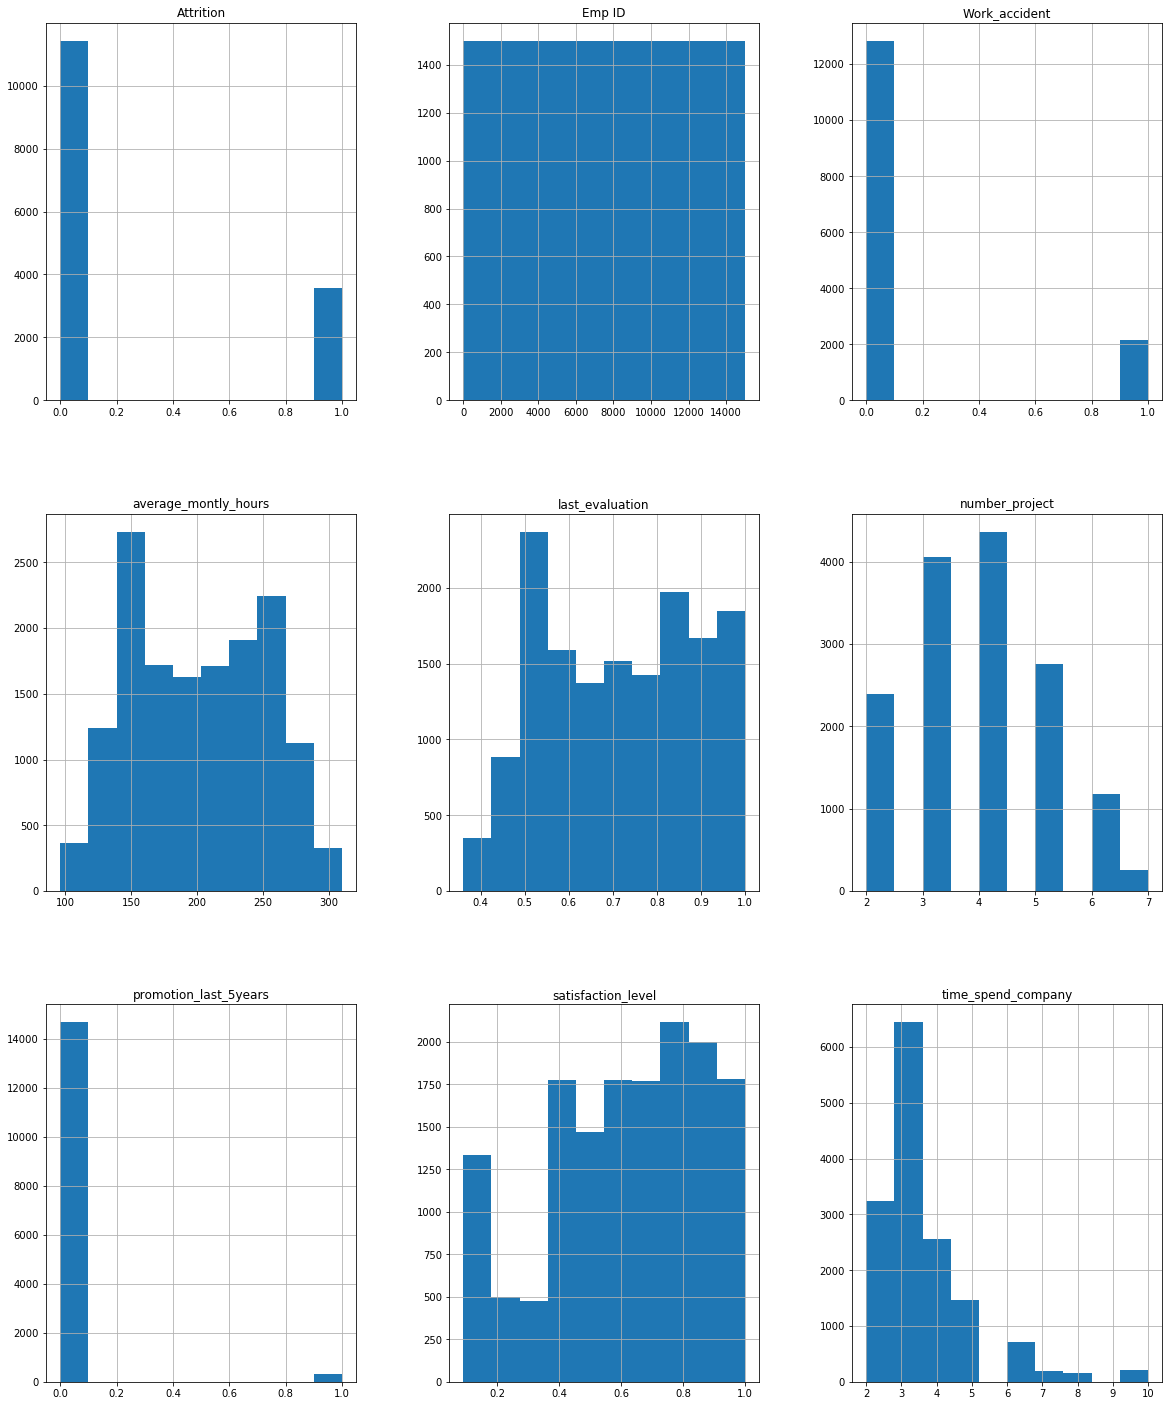

In [54]:
#Histogram of numerical variables 
num_bins = 10 
full_data.hist(bins=num_bins,figsize=(20,25))
plt.savefig("hr_histogram_plots")
plt.show()

In [55]:
#create dummy variables for categorical variables 
categorical_variables = ['dept','salary']
for var in categorical_variables:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(full_data[var],prefix=var)
    full_data1 = full_data.join(cat_list)
    full_data = full_data
    

In [56]:
full_data.drop(full_data.columns[[9,10]],axis=1,inplace=True)

In [57]:
full_data.columns.values

array(['Emp ID', 'Attrition', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years'], dtype=object)

In [58]:
full_data_vars = full_data.columns.values.tolist()
y=['Attrition']
X=[i for i in full_data_vars if i not in y]
X

['Emp ID',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Recursive feature elimination (RFE)
model = LogisticRegression()
rfe = RFE(model,10)
rfe = rfe.fit(full_data[X],full_data[y])
print(rfe.support_)
print(rfe.ranking_)

/home/none/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


/home/none/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
cols = [ 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']
X = full_data[cols]
y = full_data['Attrition']


In [65]:
#Logistic regression model 
#split the data into training and test samples 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#create a model and train 
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
#predict the results for the test
test_pred = model.predict(X_test)

#test the accuracy 
accuracy_score(y_test,test_pred)

0.9915555555555555

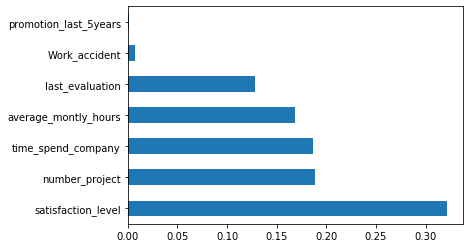

In [72]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances= feat_importances.nlargest(20)
feat_importances.plot(kind='barh')
plt.savefig('feat_importances_barh')
plt.show()